In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

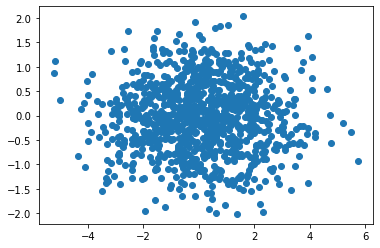

In [53]:
data = multivariate_normal(mean=[0,0], cov=[[3, 0],[0, 0.5]]).rvs(1000)
plt.scatter(data[:, 0], data[:, 1]);

In [7]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [ ]:
g[X_ /; VectorQ[X] , mu_ /; VectorQ[mu] , sigma_ /; MatrixQ[sigma] , pw_]:
    =Module[{d=Length[mu]},\[IndentingNewLine]-1/2 (X-mu).Inverse[sigma].(X-mu)- d/2 Log[2\[Pi]] - 1/2 Log[Det[sigma]] + Log[pw]\[IndentingNewLine]]; 

In [22]:
mu1=np.array([0,0]); sigma1=np.array([[1.0, 0.5],[0.5, 1.0]]); pw1=0.5;
mu2=np.array([0,0]); sigma2=np.array([[1.0, 0.5],[0.5, 1.0]]); pw2=0.5;
samples1=10; points1=multivariate_normal(mean=mu1, cov=sigma1).rvs(samples1);
samples2=10; points2=multivariate_normal(mean=mu2, cov=sigma2).rvs(samples2);

In [213]:
def multivariate_gaussian(pos, mu, cov):
    n = 1
#     mu.shape[0]
    cov_det = np.linalg.det(cov)
    cov_inv = np.linalg.inv(cov)
    N = np.sqrt((2*np.pi)**n * cov_det)
    # (x-mu)T Sigma-1 (x-mu)
    fac = np.einsum('...k,kl,...l->...', pos-mu, cov_inv, pos-mu)

    return np.exp(-fac / 2) / N

def generate_gauss(mu, cov):
    
    N = 100
    X = np.linspace(-4, 4, N)
    Y = np.linspace(-4, 4, N)
    X, Y = np.meshgrid(X, Y)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    Z = multivariate_gaussian(pos, mu, cov)
    
    return X, Y, Z

def plot_dist_contour(values, ax, v=[15, -10], title=''):
    
    for (X, Y, Z) in values:
        ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap='viridis')
        ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap='viridis')

        ax.set_zlim(-0.2, 0.5)
        ax.set_zticks(np.linspace(-0.1, 0.5, 10))
        ax.view_init(v[0], v[1])
        
    ax.set_title(title)

    return ax

In [214]:
estmu1 = np.array([np.mean(points1[:, 0]), np.mean(points1[:, 1])])
estmu2 = np.array([np.mean(points2[:, 0]), np.mean(points2[:, 1])])

estsigma1 = np.cov(points1[:, 0], points1[:, 1])
estsigma2 = np.cov(points2[:, 0], points2[:, 1])

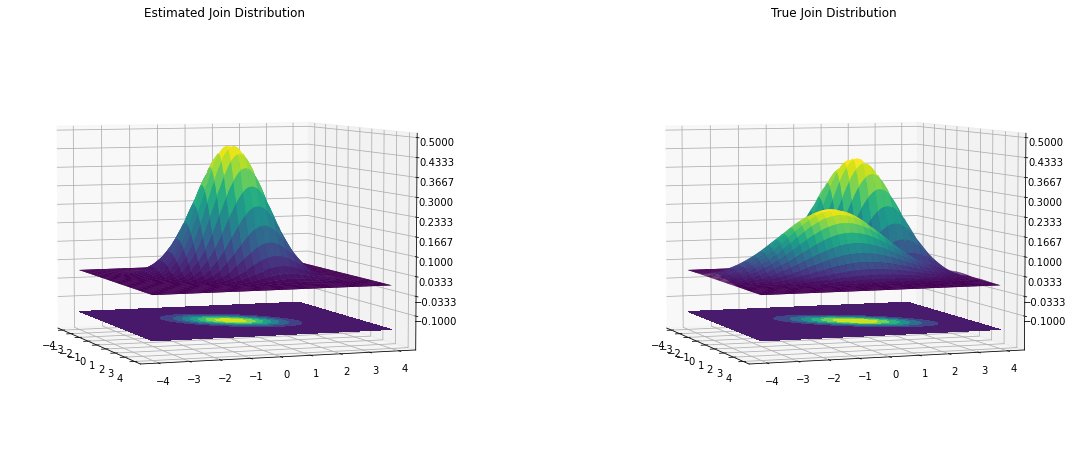

In [216]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121, projection='3d') 
X1, Y1, Z1 = generate_gauss(mu1, sigma1)
X2, Y2, Z2 = generate_gauss(mu2, sigma2)
plot_dist_contour(values=[[X1, Y1, Z1], 
                          [X2, Y2, Z2]], 
                  ax=ax1, v=[5, -20], 
                  title='Estimated Join Distribution')

ax2 = fig.add_subplot(122, projection='3d') 
X1, Y1, Z1 = generate_gauss(estmu1, estsigma1)
X2, Y2, Z2 = generate_gauss(estmu2, estsigma2)
plot_dist_contour(values=[[X1, Y1, Z1], 
                          [X2, Y2, Z2]], 
                  ax=ax2, v=[5, -20],
                  title='True Join Distribution');